In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
df = pd.read_csv('../Data/final_data/abruzzo.csv')

df.Date = pd.to_datetime(df.Date)

df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df = df[280:]

display(df)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance,Year,Month
280,Abruzzo,HOTELLIKE,Italia,2008-01-01,88624.0,257703.0,2008,1
281,Abruzzo,HOTELLIKE,Paesi esteri,2008-01-01,5346.0,19124.0,2008,1
282,Abruzzo,OTHER,Italia,2008-01-01,5701.0,20039.0,2008,1
283,Abruzzo,OTHER,Paesi esteri,2008-01-01,202.0,2600.0,2008,1
284,Chieti,HOTELLIKE,Italia,2008-01-01,13790.0,37455.0,2008,1
...,...,...,...,...,...,...,...,...
3635,Pescara,OTHER,Paesi esteri,2021-12-01,145.0,409.0,2021,12
3636,Teramo,HOTELLIKE,Italia,2021-12-01,7582.0,19674.0,2021,12
3637,Teramo,HOTELLIKE,Paesi esteri,2021-12-01,410.0,1761.0,2021,12
3638,Teramo,OTHER,Italia,2021-12-01,1333.0,4437.0,2021,12


In [44]:
def make_mask(df:pd.DataFrame, region:str, infrastructure:str, residence:str):
    df = df[(df['Region'] == region) & (df['Infrastructure'] == infrastructure) & (df['ResidenceCountry']==residence)]
    return df

In [45]:
df_abr_hotel_ita = make_mask(df, 'Abruzzo', 'HOTELLIKE', 'Italia')

display(df_abr_hotel_ita)

,Region,Infrastructure,ResidenceCountry,Date,Arrivals,Attendance,Year,Month
280,Abruzzo,HOTELLIKE,Italia,2008-01-01,88624.0,257703.0,2008,1
300,Abruzzo,HOTELLIKE,Italia,2008-02-01,100147.0,269014.0,2008,2
320,Abruzzo,HOTELLIKE,Italia,2008-03-01,84219.0,221282.0,2008,3
340,Abruzzo,HOTELLIKE,Italia,2008-04-01,72917.0,162002.0,2008,4
360,Abruzzo,HOTELLIKE,Italia,2008-05-01,87828.0,202270.0,2008,5
...,...,...,...,...,...,...,...,...
3540,Abruzzo,HOTELLIKE,Italia,2021-08-01,230100.0,1046762.0,2021,8
3560,Abruzzo,HOTELLIKE,Italia,2021-09-01,104274.0,336010.0,2021,9
3580,Abruzzo,HOTELLIKE,Italia,2021-10-01,58755.0,110749.0,2021,10
3600,Abruzzo,HOTELLIKE,Italia,2021-11-01,41724.0,79169.0,2021,11


In [46]:
# Set the "Mese" column as the index of the DataFrame
df_abr_hotel_ita.set_index("Date", inplace=True)

# Convert the index to a datetime index
df_abr_hotel_ita.index = pd.DatetimeIndex(df_abr_hotel_ita.index)

In [47]:
# Create train and test sets
train = df_abr_hotel_ita.iloc[:-24]
test = df_abr_hotel_ita.iloc[-24:]

display(train)
display(test)

,Region,Infrastructure,ResidenceCountry,Arrivals,Attendance,Year,Month
Date,,,,,,,
2008-01-01,Abruzzo,HOTELLIKE,Italia,88624.0,257703.0,2008,1
2008-02-01,Abruzzo,HOTELLIKE,Italia,100147.0,269014.0,2008,2
2008-03-01,Abruzzo,HOTELLIKE,Italia,84219.0,221282.0,2008,3
2008-04-01,Abruzzo,HOTELLIKE,Italia,72917.0,162002.0,2008,4
2008-05-01,Abruzzo,HOTELLIKE,Italia,87828.0,202270.0,2008,5
...,...,...,...,...,...,...,...
2019-08-01,Abruzzo,HOTELLIKE,Italia,208372.0,976823.0,2019,8
2019-09-01,Abruzzo,HOTELLIKE,Italia,90659.0,286591.0,2019,9
2019-10-01,Abruzzo,HOTELLIKE,Italia,56636.0,104621.0,2019,10


,Region,Infrastructure,ResidenceCountry,Arrivals,Attendance,Year,Month
Date,,,,,,,
2020-01-01,Abruzzo,HOTELLIKE,Italia,72631.0,167895.0,2020,1
2020-02-01,Abruzzo,HOTELLIKE,Italia,75642.0,163788.0,2020,2
2020-03-01,Abruzzo,HOTELLIKE,Italia,13115.0,38313.0,2020,3
2020-04-01,Abruzzo,HOTELLIKE,Italia,1265.0,10848.0,2020,4
2020-05-01,Abruzzo,HOTELLIKE,Italia,6532.0,20803.0,2020,5
2020-06-01,Abruzzo,HOTELLIKE,Italia,52666.0,123808.0,2020,6
2020-07-01,Abruzzo,HOTELLIKE,Italia,146351.0,551581.0,2020,7
2020-08-01,Abruzzo,HOTELLIKE,Italia,234962.0,964651.0,2020,8
2020-09-01,Abruzzo,HOTELLIKE,Italia,92529.0,303659.0,2020,9


C:\Users\ICTS21-23.115\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ICTS21-23.115\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2021-12-01 00:00:00


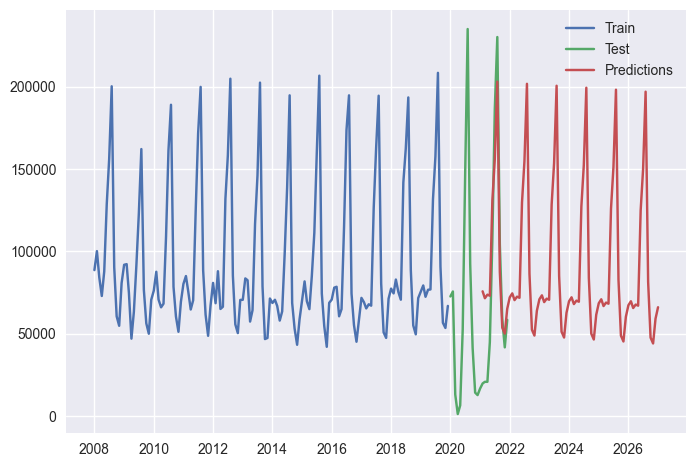

In [48]:
# Define the SARIMAX model
model = SARIMAX(train["Arrivals"], order=(1,1,1), seasonal_order=(1,1,1,12))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start='2021-01-31 00:00:00', end='2026-12-31 00:00:00')
print(test.index[-1])
# Plot the predictions
plt.plot(train.index, train["Arrivals"], label="Train")
plt.plot(test.index, test["Arrivals"], label="Test")
plt.plot(predictions.index, predictions, label="Predictions")
plt.legend()
plt.show()


C:\Users\ICTS21-23.115\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ICTS21-23.115\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2021-12-01 00:00:00


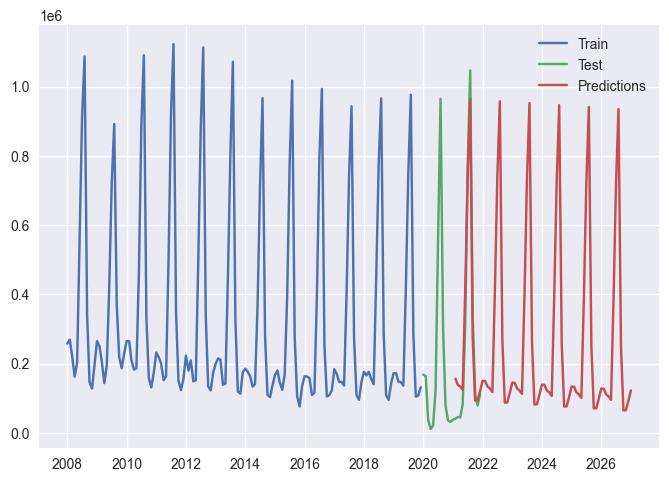

In [49]:
# Define the SARIMAX model
model = SARIMAX(train["Attendance"], order=(1,1,1), seasonal_order=(1,1,1,12))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start='2021-01-31 00:00:00', end='2026-12-31 00:00:00')
print(test.index[-1])
# Plot the predictions
plt.plot(train.index, train["Attendance"], label="Train")
plt.plot(test.index, test["Attendance"], label="Test")
plt.plot(predictions.index, predictions, label="Predictions")
plt.legend()
plt.show()


In [51]:
import pickle

# Deploy del modello
pickle.dump(model, open('model.pkl', 'wb'))